# Bikeshare data analysis

This is an analysis of bike trip data from a company in Chicago, Divvy. The financial analysts have come to the conclusion that members are more profitable to the company than casual riders. This study is commissioned by the marketing director Lily Moreno who wants to launch a campaign targetting to convert casual users to members. This analysis aims to look at the different ways casuals and members use the service. 

This notebook documents the ask, prepare, process, analyze, share phases of the data analysis cycle.

Some of the files used especially the trip_data folder are huge so here's a link to the data that you can download and reproduce this analysis. https://drive.google.com/drive/folders/1eh7afaC4Q_8OqkOaKh-XfzoI_Ei1OF9V?usp=sharing

In [3]:
#importing the required modules

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 

In [4]:
# Load the data. The files are available in the data folder in the google drive link provided in the README.

january_data = pd.read_csv('trip_data/january2021.csv')
feb_data = pd.read_csv('trip_data/feb2021.csv')
march_data = pd.read_csv('trip_data/march2021.csv')
april_data = pd.read_csv('trip_data/april2021.csv')
may_data = pd.read_csv('trip_data/may2021.csv')
june_data = pd.read_csv('trip_data/june2021.csv')
july_data = pd.read_csv('trip_data/july2021.csv')
august_data = pd.read_csv('trip_data/august2021.csv')
september_data = pd.read_csv('trip_data/september2021.csv')
october_data = pd.read_csv('trip_data/october2021.csv')
november_data = pd.read_csv('trip_data/november2021.csv')
december_data = pd.read_csv('trip_data/december2021.csv')

In [5]:
# Combine the data into one dataframe.
whole_year_data = pd.concat([january_data, feb_data, march_data, april_data, may_data, june_data, july_data, august_data, september_data, october_data, november_data, december_data])

#sShowing the tail end of the dataframe to show that all the monthly data has been combined to one dataframe
whole_year_data.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member
247539,37AC57E34B2E7E97,classic_bike,2021-12-13 08:45:32,2021-12-13 08:49:09,Michigan Ave & Jackson Blvd,TA1309000002,Dearborn St & Monroe St,TA1305000006,41.877850,-87.624080,41.881320,-87.629521,member


In [5]:
# Drop the columns that are not needed.
modified_year_data = whole_year_data.drop(['start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1)

In [6]:
#Check the data type of the columns and change the data types to the correct data type.

modified_year_data.dtypes
modified_year_data['started_at'] = pd.to_datetime(modified_year_data['started_at'])
modified_year_data['ended_at'] = pd.to_datetime(modified_year_data['ended_at'])

In [7]:
#Creating a new column for duration using 'started at' and 'ended at' columns
modified_year_data['duration'] = modified_year_data['ended_at'] - modified_year_data['started_at']

#Convert the timedelta object created to a float data type to enable easy manipulation of the same
modified_year_data['duration'] = modified_year_data['duration'].dt.total_seconds()

#Change name of member_casual column
modified_year_data.rename(columns = {'member_casual':'member_type'}, inplace = True)

#Check to see column has been renamed
modified_year_data.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_type,duration
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,NaN,member,625.0
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,NaN,member,244.0
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,NaN,member,80.0
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,NaN,member,702.0
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,NaN,casual,43.0


In [8]:
#Split the 'started_at' column into day, day of week, month and year. This will make it easier to aggregate the data

modified_year_data["day"] = modified_year_data['started_at'].map(lambda x: x.day)
modified_year_data["month"] = modified_year_data['started_at'].map(lambda x: x.month)
modified_year_data["year"] = modified_year_data['started_at'].map(lambda x: x.year)
modified_year_data["day_of_week"] = modified_year_data['started_at'].dt.dayofweek



#Check to see the new columns created. For day of week, the range is 0-6 representing Sunday through Saturday
modified_year_data.head(5)



,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_type,duration,day,month,year,day_of_week
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,NaN,member,625.0,23,1,2021,5
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,NaN,member,244.0,27,1,2021,2
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,NaN,member,80.0,21,1,2021,3
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,NaN,member,702.0,7,1,2021,3
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,NaN,casual,43.0,23,1,2021,5


In [21]:
#Change day of week from variables 0,1,2..etc to regular names Sunday, Monday...etc
modified_year_data['day_of_week'] = modified_year_data['day_of_week'].replace([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
modified_year_data.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_type,duration,day,month,year,day_of_week
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,NaN,member,625.0,23,1,2021,Friday
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,NaN,member,244.0,27,1,2021,Tuesday
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,NaN,member,80.0,21,1,2021,Wednesday
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,NaN,member,702.0,7,1,2021,Wednesday
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,NaN,casual,43.0,23,1,2021,Friday


In [9]:
#from modified_data dataframe, we'll extract a subset to analyze
subset_of_modified_data = modified_year_data.drop(['ride_id', 'started_at', 'ended_at', 'start_station_name', 'end_station_name'], axis=1)

#This is an intermediate step to create a dataframe with 2 columns i.e. member type and duration
member_duration = subset_of_modified_data[['member_type', 'duration']]

#Lets get the total duration by membership type
total_duration_by_membership_type = member_duration.groupby('member_type', as_index=False).sum()
total_duration_by_membership_type.head(5)

#Saving the dataframe to a csv file for further analysis
total_duration_by_membership_type.to_csv(r'C:\Users\Stai Ndirangu\Desktop\divvy\results\total_duration_by_membership_type.csv', index=True)

In [10]:
#Now let's remove missing values from our dataframe
clean_subset_of_modified_data = subset_of_modified_data.dropna()

#Let's further clean our dataset by removing the negative trip lengths i.e. testing trips and trips that didnt leave the station
negative_trip_length = clean_subset_of_modified_data[clean_subset_of_modified_data.duration < 0]

#Dropping the negative values
clean_subset_of_modified_data.drop(clean_subset_of_modified_data[clean_subset_of_modified_data['duration'] < 0].index, inplace = True)

In [11]:
#We can calculate a few more descriptive statistics based on member type and duration. We'll also save the same as a csv files in the results directory
mean_duration_by_membership_type = member_duration.groupby('member_type', as_index=False).mean()

mean_duration_by_membership_type['mean_duration_in_mins'] = (mean_duration_by_membership_type['duration'])/60
mean_duration_by_membership_type.to_csv(r'C:\Users\Stai Ndirangu\Desktop\divvy\results\mean_duration_by_membership_type.csv', index=True)

median_duration_by_membership_type = member_duration.groupby('member_type', as_index=False).median()
median_duration_by_membership_type.to_csv(r'C:\Users\Stai Ndirangu\Desktop\divvy\results\median_duration_by_membership_type.csv', index=True)

In [17]:
#We now want to get the daily ridership data by member type and duration and save the same to a csv file
day_of_week_duration = subset_of_modified_data[['member_type', 'duration', 'day_of_week']]

sum_of_duration_by_dayofweek = day_of_week_duration.groupby(['day_of_week', 'member_type'],as_index=False).sum()

sum_of_duration_by_dayofweek.to_csv(r'C:\Users\Stai Ndirangu\Desktop\divvy\results\sum_of_duration_by_dayofweek.csv', index=True)

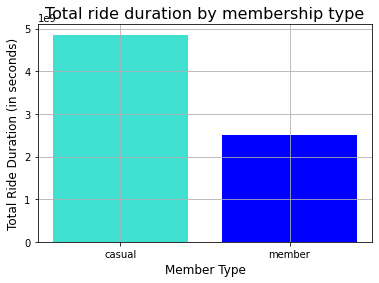

In [15]:
#from the summary statistics above, we can visualize a few of the results generated to try make sense of them using matplotib

#Lets visualize the sum of ride duration by member type
bar1_colors = ['turquoise','blue']
plt.bar(total_duration_by_membership_type['member_type'], total_duration_by_membership_type['duration'], color=bar1_colors)
plt.title('Total ride duration by membership type', fontsize=16)
plt.xlabel('Member Type', fontsize=12)
plt.ylabel('Total Ride Duration (in seconds)', fontsize=12)
plt.grid(True)
plt.show()

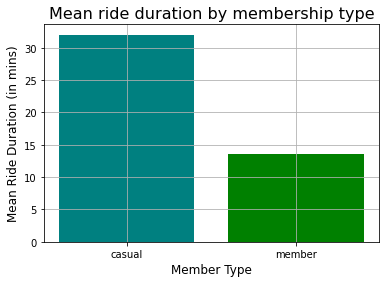

In [14]:
#Lets visualize the mean of ride duration by member type
bar2_colors = ['teal','green']
plt.bar(mean_duration_by_membership_type['member_type'], mean_duration_by_membership_type['mean_duration_in_mins'], color=bar2_colors)
plt.title('Mean ride duration by membership type', fontsize=16)
plt.xlabel('Member Type', fontsize=12)
plt.ylabel('Mean Ride Duration (in mins)', fontsize=12)
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Sum of duration by day of week')

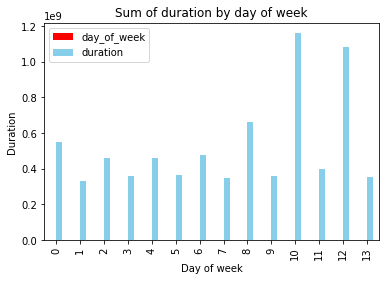

In [19]:
#Lets visualize sum of duration per day of the week by member type
sum_of_duration_by_dayofweek.plot(kind='bar', stacked=False, color=['red', 'skyblue'])
 
# labels for x & y axis
plt.xlabel('Day of week')
plt.ylabel('Duration')
 
# title of plot
plt.title('Sum of duration by day of week')